In [7]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import matplotlib as mpl
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, u_darrays as uda, u_arrays as ua
from utils import u_statistics as u_stats
import datetime
import matplotlib.colors as mcolors
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
from utils import u_plot as uplot
import salem
import numpy.ma as ma
from scipy import stats, ndimage
import warnings
from scipy.ndimage.measurements import label
import shapely.geometry as shpg
import datetime
from scipy.stats import gaussian_kde, linregress
import pickle as pkl

import glob

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [6]:
cd ..


/home/ck/pythonWorkspace/proj_CEH


In [8]:
fpath = cnst.network_data + 'figs/HUARAZ/'

In [9]:
def readERA(var):

    u200orig = xr.open_dataset(glob.glob('/media/ck/Elements/SouthAmerica/ERA5/hourly/'+var+'_15UTC_1981*_peru_*.nc')[0])
    u200orig = uda.flip_lat(u200orig)
    datetimes = pd.to_datetime(u200orig.time.values)
    newtimes = []
    for t in datetimes:
        newtimes.append(t.replace(hour=0))
    u200orig['time'] = ('time', newtimes)
    return u200orig

In [10]:
fname = '/home/ck/DIR/cornkle/data/HUARAZ/shapes/riosan_sel_one.shp'
isbuffer = [-78, -77, -10.3, -8.5]

#isbuffer = [-74.5, -65, -20, -13] Altiplano

sdf = salem.read_shapefile(fname)
sdf = salem.transform_geopandas(sdf, to_crs=salem.wgs84)

In [11]:
era = xr.open_mfdataset('/media/ck/Elements/SouthAmerica/ERA5/monthly/pressure_levels/synop/ERA5_monthly_pl*.nc')
era = uda.flip_lat(era)

In [12]:
eroi = era.salem.roi(shape=sdf)

In [22]:
rio_lapse_full = eroi.mean(['latitude','longitude']).squeeze().isel(expver=0)

In [14]:
y1=2020

rio_lapse.sel(time= (((rio_lapse['time.month']==8) & (rio_lapse['time.day']>=15) ) | ((rio_lapse['time.month']==9) & (rio_lapse['time.day']<=15))) & (rio_lapse['time.year']<=y1))#.mean('time')

<xarray.Dataset>
Dimensions:  (level: 17, time: 336)
Coordinates:
    expver   int32 1
  * level    (level) int32 200 300 400 500 550 600 ... 850 875 900 925 950 975
  * time     (time) datetime64[ns] 1979-09-01 ... 2020-09-01T21:00:00
Data variables:
    d        (time, level) float32 dask.array<chunksize=(8, 17), meta=np.ndarray>
    z        (time, level) float32 dask.array<chunksize=(8, 17), meta=np.ndarray>
    r        (time, level) float32 dask.array<chunksize=(8, 17), meta=np.ndarray>
    q        (time, level) float32 dask.array<chunksize=(8, 17), meta=np.ndarray>
    t        (time, level) float32 dask.array<chunksize=(8, 17), meta=np.ndarray>
    u        (time, level) float32 dask.array<chunksize=(8, 17), meta=np.ndarray>
    v        (time, level) float32 dask.array<chunksize=(8, 17), meta=np.ndarray>
    w        (time, level) float32 dask.array<chunksize=(8, 17), meta=np.ndarray>

/home/ck/miniconda3/lib/python3.7/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


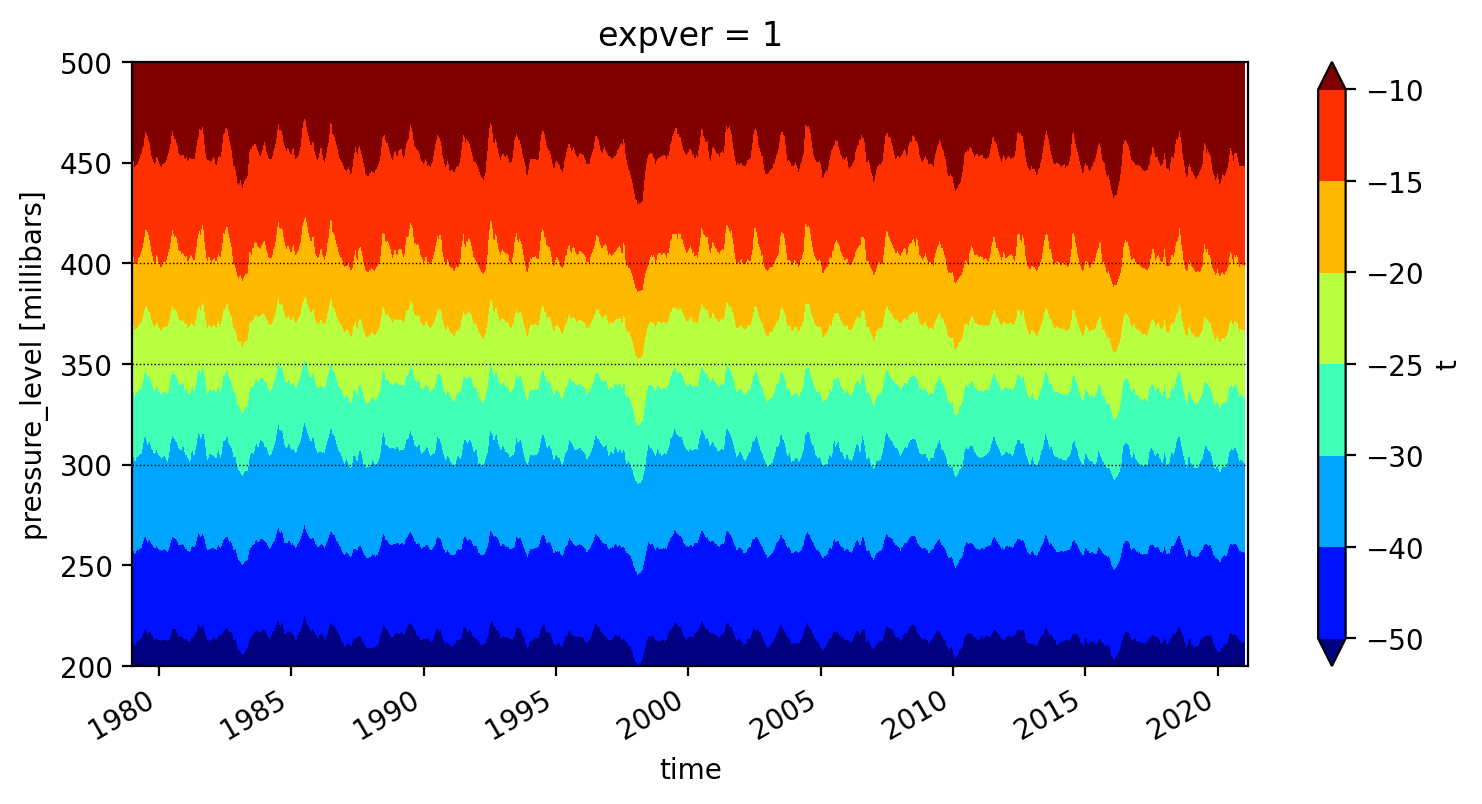

In [15]:
f = plt.figure(figsize=(9,4), dpi=200)

ax = f.add_subplot(111)
(rio_lapse['t']-273.15).sel(level=slice(200,500)).T.plot.contourf(levels=[-10,-15,-20,-25,-30,-40,-50], cmap='jet')

ax.axhline(400, linestyle='dotted', linewidth=0.5, color='k')
ax.axhline(300, linestyle='dotted', linewidth=0.5, color='k')
ax.axhline(350, linestyle='dotted', linewidth=0.5, color='k')

#f.savefig('/home/ck/DIR/cornkle/figs/HUARAZ/lapse_rate_T_RioSanta_fullyear.jpg')

In [16]:
y1=2020

rio_lapse = rio_lapse_full.sel(time= (((rio_lapse_full['time.month']==8) & (rio_lapse_full['time.day']>=15) ) | ((rio_lapse_full['time.month']==9) & (rio_lapse_full['time.day']<=15))) & (rio_lapse_full['time.year']<=y1))#.mean('time')

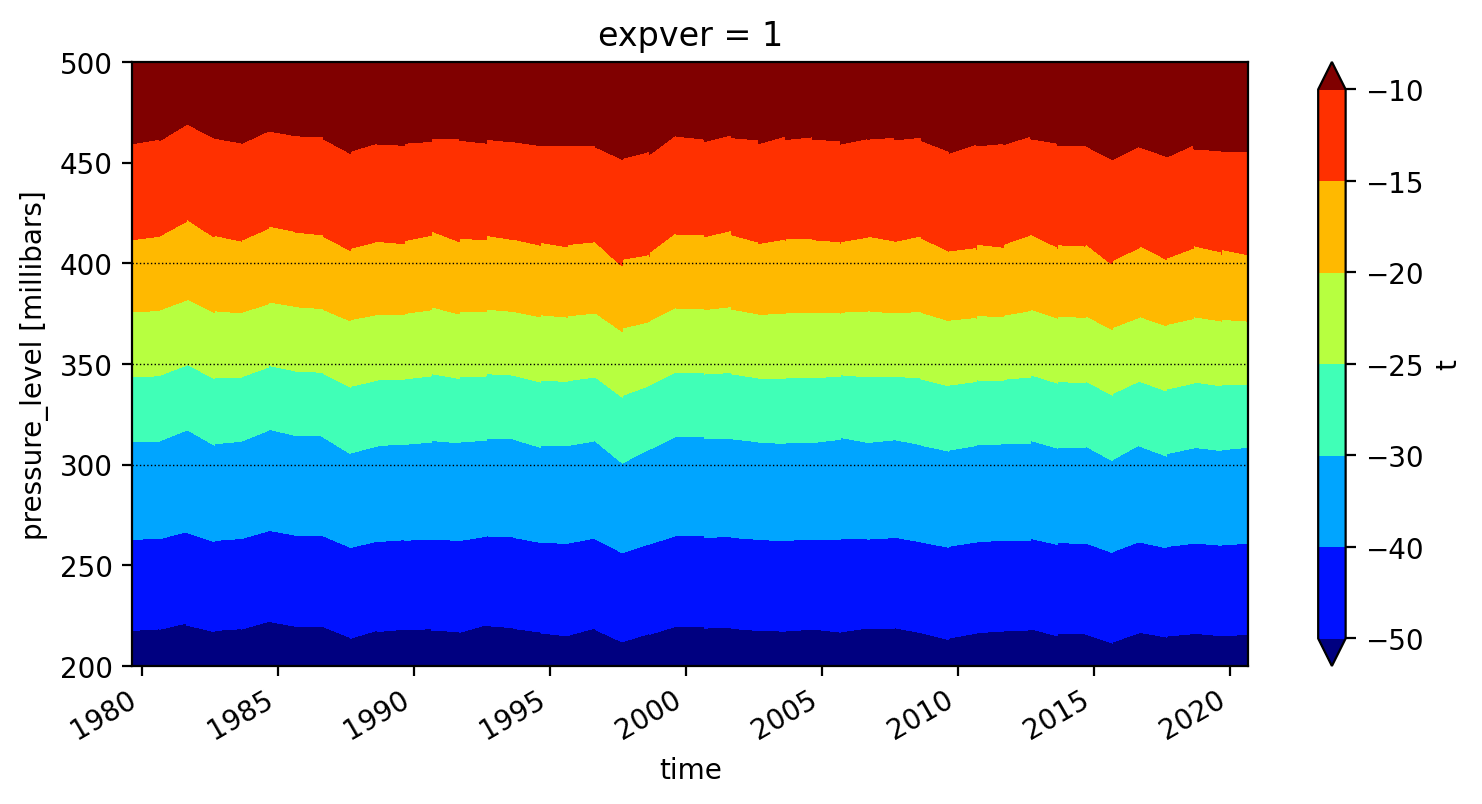

In [17]:
f = plt.figure(figsize=(9,4), dpi=200)

ax = f.add_subplot(111)
(rio_lapse['t']-273.15).sel(level=slice(200,500)).T.plot.contourf(levels=[-10,-15,-20,-25,-30,-40,-50], cmap='jet')

ax.axhline(400, linestyle='dotted', linewidth=0.5, color='k')
ax.axhline(300, linestyle='dotted', linewidth=0.5, color='k')
ax.axhline(350, linestyle='dotted', linewidth=0.5, color='k')

f.savefig('/home/ck/DIR/cornkle/figs/HUARAZ/lapse_rate_T_RioSanta_midAug-midSep.jpg')

In [18]:
rio_lapse

<xarray.Dataset>
Dimensions:  (level: 17, time: 336)
Coordinates:
    expver   int32 1
  * level    (level) int32 200 300 400 500 550 600 ... 850 875 900 925 950 975
  * time     (time) datetime64[ns] 1979-09-01 ... 2020-09-01T21:00:00
Data variables:
    d        (time, level) float32 dask.array<chunksize=(8, 17), meta=np.ndarray>
    z        (time, level) float32 dask.array<chunksize=(8, 17), meta=np.ndarray>
    r        (time, level) float32 dask.array<chunksize=(8, 17), meta=np.ndarray>
    q        (time, level) float32 dask.array<chunksize=(8, 17), meta=np.ndarray>
    t        (time, level) float32 dask.array<chunksize=(8, 17), meta=np.ndarray>
    u        (time, level) float32 dask.array<chunksize=(8, 17), meta=np.ndarray>
    v        (time, level) float32 dask.array<chunksize=(8, 17), meta=np.ndarray>
    w        (time, level) float32 dask.array<chunksize=(8, 17), meta=np.ndarray>

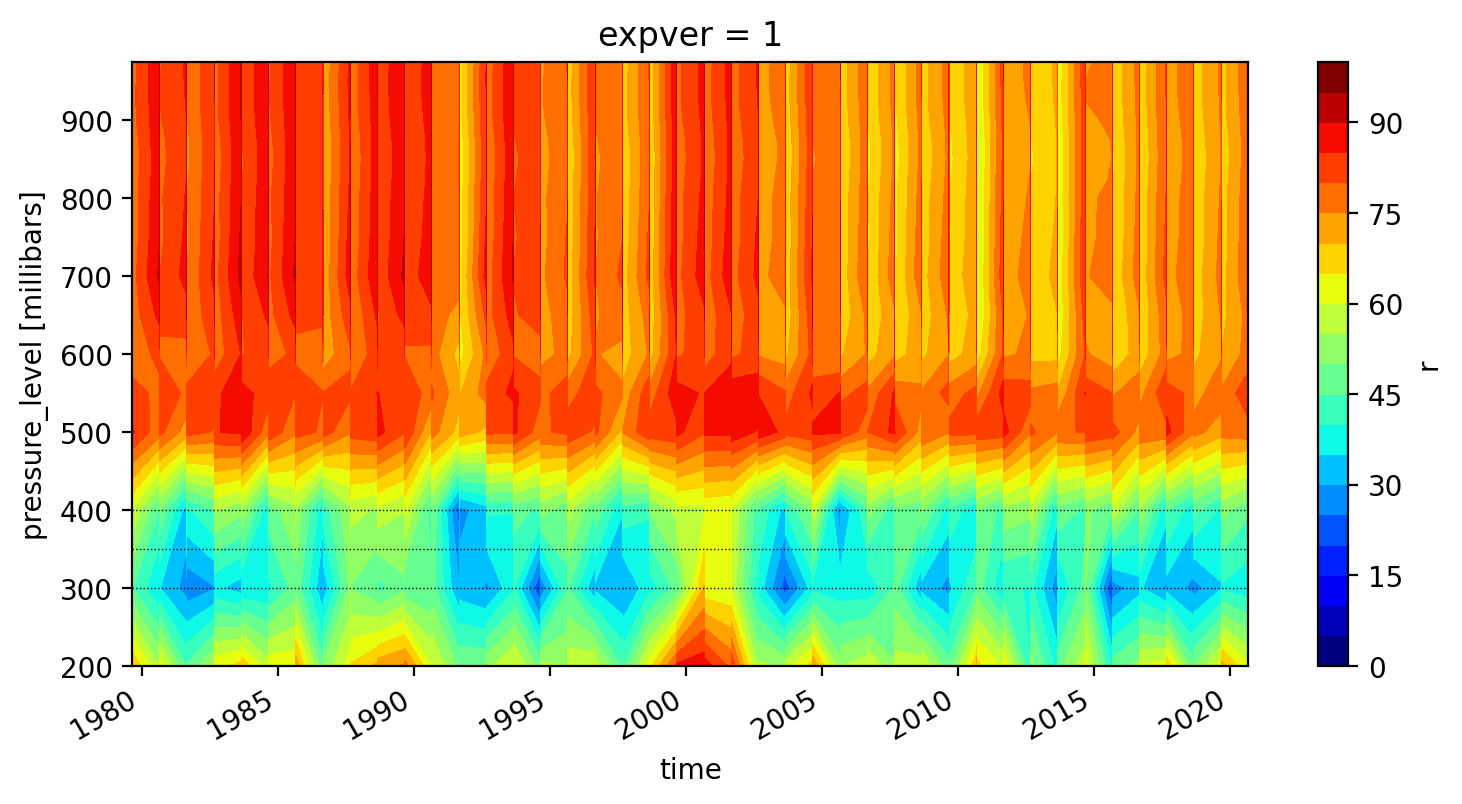

In [19]:
f = plt.figure(figsize=(9,4), dpi=200)

ax = f.add_subplot(111)
(rio_lapse['r']).sel(level=slice(200,1000)).T.plot.contourf(levels=np.arange(0,101,5), cmap='jet')

ax.axhline(400, linestyle='dotted', linewidth=0.5, color='k')
ax.axhline(300, linestyle='dotted', linewidth=0.5, color='k')
ax.axhline(350, linestyle='dotted', linewidth=0.5, color='k')

#f.savefig('/home/ck/DIR/cornkle/figs/HUARAZ/lapse_rate_T_RioSanta_midAug-midSep.jpg')

In [27]:
rio_lapse = rio_lapse_full.sel(time= (((rio_lapse_full['time.month']==11) & (rio_lapse_full['time.day']>=15) ) | ((rio_lapse_full['time.month']==12) & (rio_lapse_full['time.day']<=15))) & (rio_lapse_full['time.year']<=y1))#.mean('time')

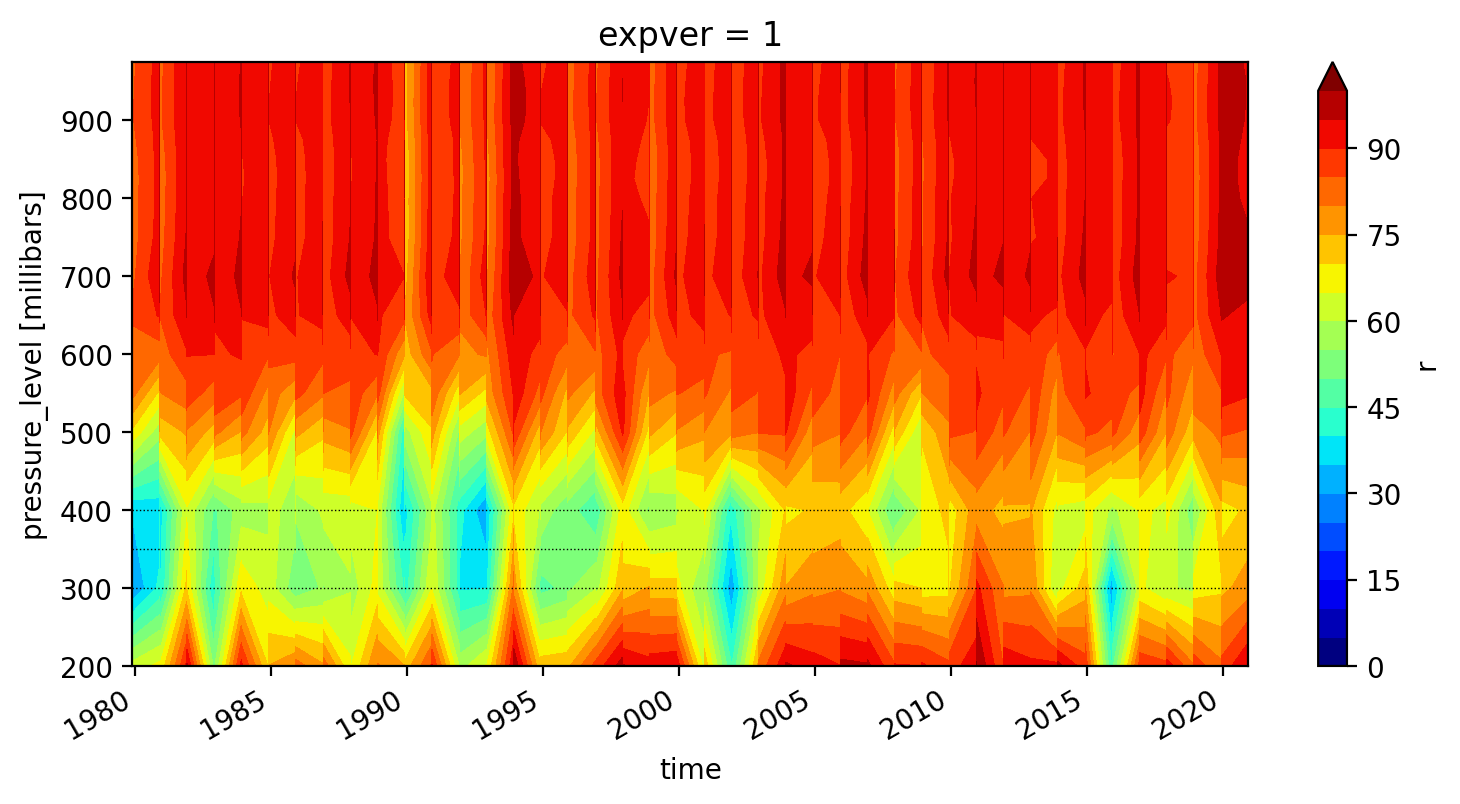

In [28]:
f = plt.figure(figsize=(9,4), dpi=200)

ax = f.add_subplot(111)
(rio_lapse['r']).sel(level=slice(200,1000)).T.plot.contourf(levels=np.arange(0,101,5), cmap='jet')

ax.axhline(400, linestyle='dotted', linewidth=0.5, color='k')
ax.axhline(300, linestyle='dotted', linewidth=0.5, color='k')
ax.axhline(350, linestyle='dotted', linewidth=0.5, color='k')

#f.savefig('/home/ck/DIR/cornkle/figs/HUARAZ/lapse_rate_T_RioSanta_midAug-midSep.jpg')